<a href="https://colab.research.google.com/github/sujaysavanth/statisticsfordata/blob/main/EDA_City_County_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 📊 Exploratory Data Analysis (EDA) - City and County Energy Profiles

This notebook includes visual and statistical summaries for both city-level and county-level U.S. energy data.


## 🏙️ City-Level Data EDA

In [2]:

!pip install pyxlsb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load City data
file_path = "/content/2016cityandcountyenergyprofiles (1).xlsb"
city_data = pd.read_excel(file_path, engine='pyxlsb', sheet_name='City', skiprows=1)
city_data.columns = city_data.iloc[2]
city_data = city_data.drop([0, 1, 2]).reset_index(drop=True)

# Extract columns
mwh_index = list(city_data.columns).index('consumption (MWh)')
tcf_index = list(city_data.columns).index('consumption (TcF)')

city_df = pd.DataFrame()
city_df['state'] = city_data['state_abbr']
city_df['population'] = pd.to_numeric(city_data['population'], errors='coerce')
city_df['electricity_MWh'] = pd.to_numeric(city_data.iloc[:, mwh_index], errors='coerce')
city_df['natural_gas_TcF'] = pd.to_numeric(city_data.iloc[:, tcf_index], errors='coerce')
city_df['total_energy_MWh'] = city_df['electricity_MWh'] + city_df['natural_gas_TcF'] * 293071
city_df.dropna(inplace=True)


### 📋 Summary Statistics - City Data

In [3]:
city_df.describe()

,population,electricity_MWh,natural_gas_TcF,total_energy_MWh
count,2.343200e+04,2.343200e+04,2.343200e+04,2.343200e+04
mean,9.786940e+03,3.569810e+04,1.510608e+05,4.427157e+10
std,7.664988e+04,2.096476e+05,1.496983e+06,4.387224e+11
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.310000e+02,1.980214e+03,2.425454e+03,7.108445e+08
50%,1.399500e+03,5.928629e+03,1.124866e+04,3.296667e+09
75%,5.087000e+03,2.079489e+04,6.152983e+04,1.803263e+10
max,8.461961e+06,1.487296e+07,1.794251e+08,5.258430e+13


### 📈 Distribution of City Population

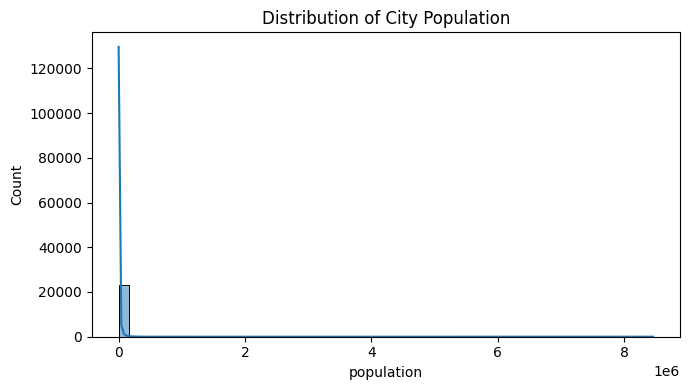

In [4]:

plt.figure(figsize=(7, 4))
sns.histplot(city_df['population'], kde=True, bins=50)
plt.title('Distribution of City Population')
plt.tight_layout()
plt.show()


### 📈 Distribution of Total Energy Usage (MWh)

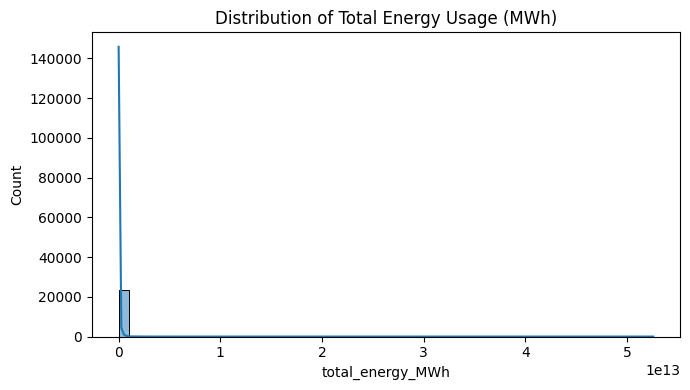

In [5]:

plt.figure(figsize=(7, 4))
sns.histplot(city_df['total_energy_MWh'], kde=True, bins=50)
plt.title('Distribution of Total Energy Usage (MWh)')
plt.tight_layout()
plt.show()


### 🏆 Top 10 States by City-Level Energy Use

<ipython-input-6-df6d2eb9fbcd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')


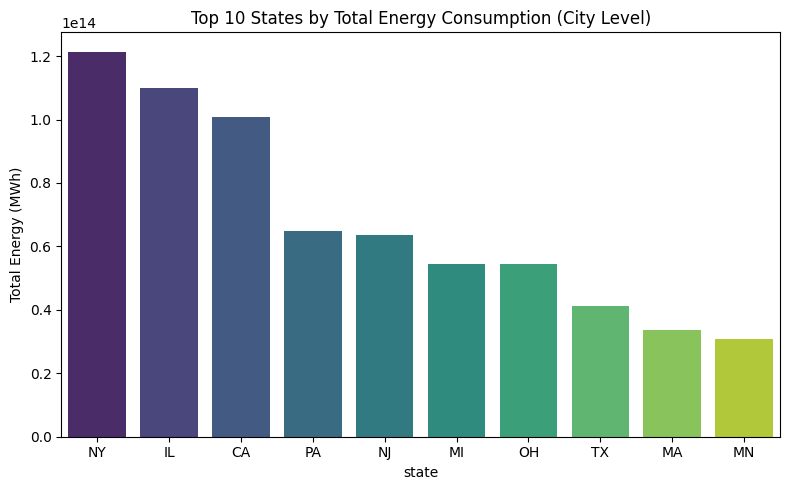

In [6]:

top_states = city_df.groupby('state')['total_energy_MWh'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')
plt.title('Top 10 States by Total Energy Consumption (City Level)')
plt.ylabel('Total Energy (MWh)')
plt.tight_layout()
plt.show()


## 🌎 County-Level Data EDA

In [7]:

county_data = pd.read_excel(file_path, engine='pyxlsb', sheet_name='County', skiprows=1)
county_data.columns = county_data.iloc[2]
county_data = county_data.drop([0, 1, 2]).reset_index(drop=True)

mwh_index = list(county_data.columns).index('consumption (MWh)')
tcf_index = list(county_data.columns).index('consumption (TcF)')
mwh_pc_index = list(county_data.columns).index('consumption (MWh/capita)')
tcf_pc_index = list(county_data.columns).index('consumption (TcF/capita)')

county_df = pd.DataFrame()
county_df['state'] = county_data['state_abbr']
county_df['population'] = pd.to_numeric(county_data['population'], errors='coerce')
county_df['employment'] = pd.to_numeric(county_data['employment'], errors='coerce')
county_df['electricity_MWh'] = pd.to_numeric(county_data.iloc[:, mwh_index], errors='coerce')
county_df['natural_gas_TcF'] = pd.to_numeric(county_data.iloc[:, tcf_index], errors='coerce')
county_df['electricity_per_capita'] = pd.to_numeric(county_data.iloc[:, mwh_pc_index], errors='coerce')
county_df['gas_per_capita'] = pd.to_numeric(county_data.iloc[:, tcf_pc_index], errors='coerce')
county_df['total_energy_MWh'] = county_df['electricity_MWh'] + county_df['natural_gas_TcF'] * 293071
county_df.dropna(inplace=True)


### 📋 Summary Statistics - County Data

In [8]:
county_df.describe()

,population,employment,electricity_MWh,natural_gas_TcF,electricity_per_capita,gas_per_capita,total_energy_MWh
count,3.142000e+03,3.142000e+03,3.142000e+03,3.142000e+03,3142.000000,3142.000000,3.142000e+03
mean,1.013871e+05,7.712663e+04,3.961642e+05,1.378120e+06,4.706351,11.187478,4.038873e+11
std,3.252017e+05,2.853479e+05,1.070702e+06,5.515763e+06,1.192879,9.268591,1.616511e+12
min,7.600000e+01,0.000000e+00,2.565768e+02,0.000000e+00,0.971985,0.000000,1.897267e+03
25%,1.099650e+04,4.123500e+03,5.401807e+04,6.714347e+04,3.938580,4.269232,1.967783e+10
50%,2.573750e+04,1.271050e+04,1.221134e+05,1.986823e+05,4.868670,8.803378,5.822822e+10
75%,6.758325e+04,4.057700e+04,3.128175e+05,6.751881e+05,5.583471,16.087146,1.978782e+11
max,1.005716e+07,7.743432e+06,2.103416e+07,1.767526e+08,10.514809,75.717535,5.180109e+13


### 📈 Distribution of Total Energy Usage (MWh)

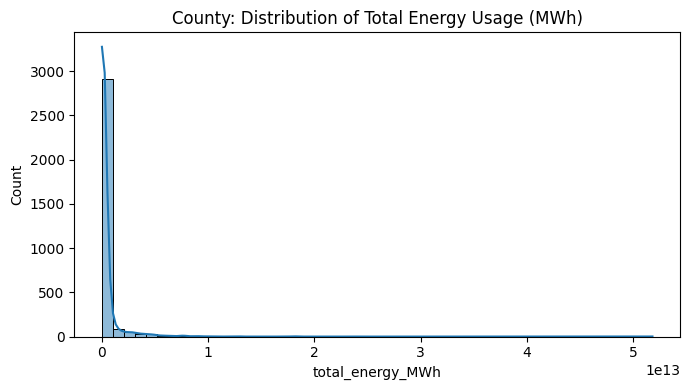

In [9]:

plt.figure(figsize=(7, 4))
sns.histplot(county_df['total_energy_MWh'], kde=True, bins=50)
plt.title('County: Distribution of Total Energy Usage (MWh)')
plt.tight_layout()
plt.show()


### 📈 Distribution of Population

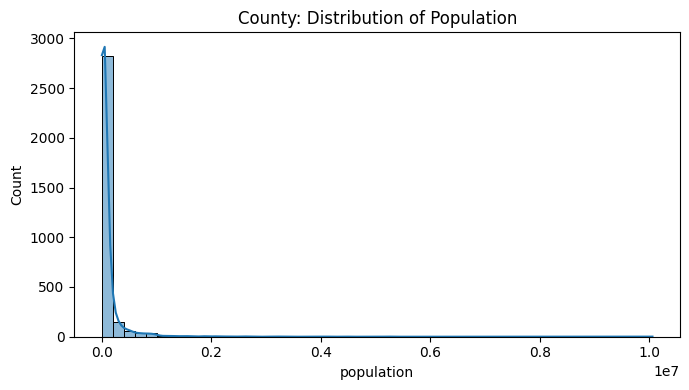

In [10]:

plt.figure(figsize=(7, 4))
sns.histplot(county_df['population'], kde=True, bins=50)
plt.title('County: Distribution of Population')
plt.tight_layout()
plt.show()


### 🔄 Electricity vs Natural Gas Per Capita

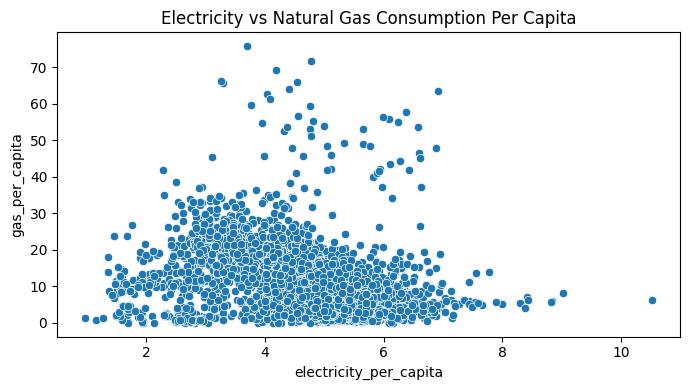

In [11]:

plt.figure(figsize=(7, 4))
sns.scatterplot(x='electricity_per_capita', y='gas_per_capita', data=county_df)
plt.title('Electricity vs Natural Gas Consumption Per Capita')
plt.tight_layout()
plt.show()


### 🔥 Correlation Heatmap - County

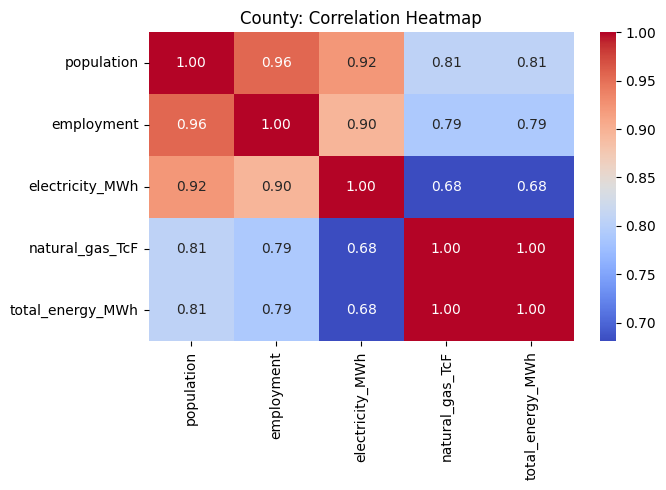

In [12]:

corr_matrix = county_df[['population', 'employment', 'electricity_MWh', 'natural_gas_TcF', 'total_energy_MWh']].corr()
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('County: Correlation Heatmap')
plt.tight_layout()
plt.show()
